# ALGORITMO NAIVE BAYES

Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Carregar Database

In [5]:
data = pd.read_csv("Breast_cancer_data.csv")
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


# Plotar o histograma da coluna "diagnosis"

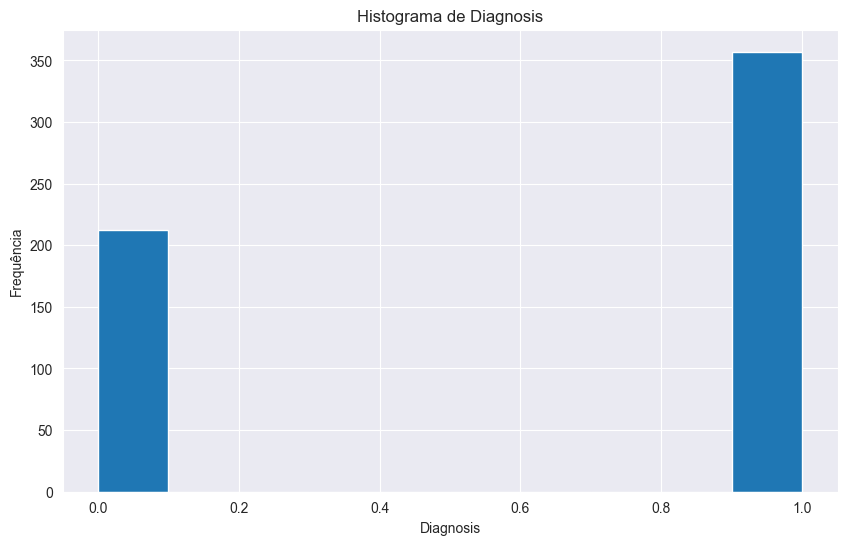

In [6]:
plt.figure(figsize=(10, 6))
data["diagnosis"].hist()
plt.title("Histograma de Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Frequência")
plt.show()

# Plotar HeatMap 

<Axes: >

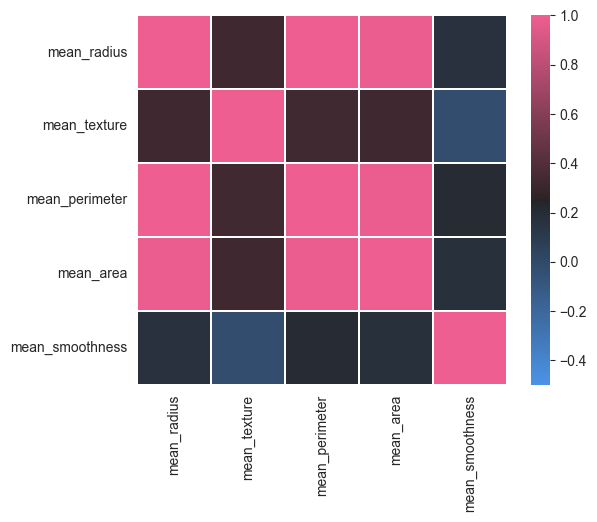

In [7]:

corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

Calcular a correlação

In [8]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


<Axes: xlabel='mean_texture', ylabel='Count'>

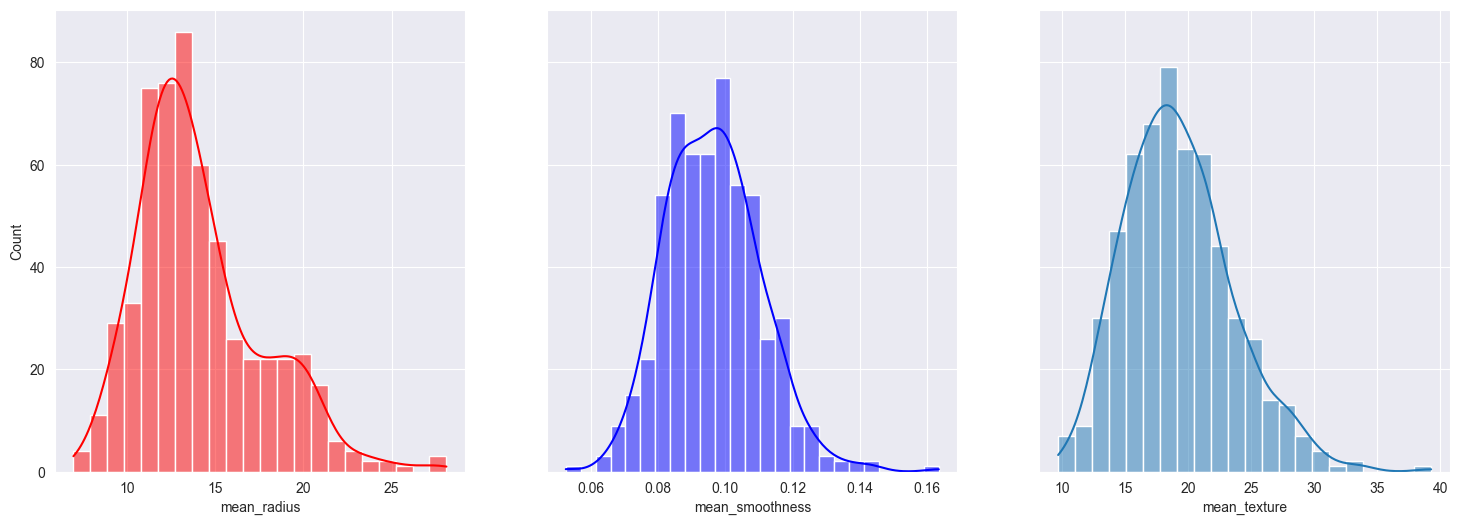

In [9]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)

# Calcular P(Y=y) para todos os possíveis y

Primeiro, vamos usar um metodo para ordenar as classes 0 e 1 na lista classes. 
Depois vamos realizar o cálculo da propoção de amostrar da classe, dividindo o número de amostras dessa classe pelo número total de amostras no DataFrame.

In [10]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df)) 
    return prior


### Descrição da Função `calculate_likelihood_gaussian`

A função `calculate_likelihood_gaussian` calcula a probabilidade (likelihood) de um valor de característica dado, assumindo que os dados seguem uma distribuição Gaussiana (ou normal). Esta função é usada como parte do algoritmo Naive Bayes, onde a suposição de normalidade das características é comum.

#### Parâmetros

- `df`: Um DataFrame do Pandas contendo os dados.
- `feat_name`: O nome da coluna no DataFrame `df` que representa a característica para a qual queremos calcular a probabilidade.
- `feat_val`: O valor da característica para o qual queremos calcular a probabilidade.
- `Y`: O nome da coluna no DataFrame `df` que contém as classes.
- `label`: O valor específico da classe para o qual estamos calculando a probabilidade.

#### Funcionamento

1. **Filtragem do DataFrame por Classe**:
   A função começa filtrando o DataFrame `df` para incluir apenas as amostras que pertencem à classe especificada por `label`.

2. **Cálculo da Média e Desvio Padrão**:
   Calcula a média (`mean`) e o desvio padrão (`std`) da característica especificada por `feat_name` para a classe filtrada.

3. **Cálculo da probabilidade Gaussiana**:
   Utiliza a fórmula da distribuição normal para calcular a propa de `feat_val` dado a classe `label`. A fórmula da densidade de probabilidade para uma distribuição normal é:

   $$
   p(x|y) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
   $$

  Onde:
- μ é a média da característica.
- σ é o desvio padrão da característica.
- x é o valor da característica.


4. **Retorno da probabilidade**:
   A função retorna a probabilidade calculada.

#### Exemplo Concreto

Vamos considerar um exemplo com dados fictícios de diagnóstico de câncer de mama. Suponha que temos o seguinte DataFrame:

Neste DataFrame:
- A coluna `diagnostico` contém os diagnósticos (0 para negativo, 1 para positivo).
- A coluna `tamanho_tumor` contém os tamanhos dos tumores.

Queremos calcular a probabilidade de um tumor com tamanho 2.5 ser positivo (diagnóstico = 1).

#### Passo 1: Filtrar o DataFrame por Classe

Filtramos o DataFrame para incluir apenas as amostras com diagnóstico positivo (1).

#### Passo 2: Calcular Média e Desvio Padrão

Calculamos a média e o desvio padrão do `tamanho_tumor` para os diagnósticos positivos.

Para este exemplo, vamos supor que:
- Média μ = 2.62
- Desvio padrão σ = 0.258

#### Passo 3: Aplicar a Fórmula da Distribuição Normal

Vamos calcular a probabilidade de um tumor com tamanho 2.5 dado que o diagnóstico é positivo:

Substituindo os valores:

$$
p(2.5|positivo) = \frac{1}{\sqrt{2 \pi \cdot 0.258^2}} \exp\left(-\frac{(2.5 - 2.62)^2}{2 \cdot 0.258^2}\right)
$$

Vamos calcular passo a passo:

\begin{align*}
\sigma^2 &= 0.258^2 = 0.066564 \\
\sqrt{2 \pi \sigma^2} &= \sqrt{2 \cdot 3.14159 \cdot 0.066564} \approx 0.6461 \\
\frac{1}{\sqrt{2 \pi \sigma^2}} &\approx 1.5484 \\
(2.5 - 2.62)^2 &= 0.0144 \\
\frac{0.0144}{2 \cdot 0.066564} &\approx 0.1081 \\
\exp(-0.1081) &\approx 0.8977
\end{align*}

Finalmente:

$$
p(2.5|positivo) \approx 1.5484 \cdot 0.8977 \approx 1.3892
$$

Portanto, a probabilidade de um tumor com tamanho 2.5 ser positivo é aproximadamente 1.3892.

### Resumo

A função `calculate_likelihood_gaussian` calcula a probabilidade de um valor de característica específico assumindo uma distribuição Gaussiana. Isso é feito filtrando os dados pela classe de interesse, calculando a média e o desvio padrão da característica, e aplicando a fórmula da distribuição normal. Este cálculo é fundamental para o Naive Bayes Gaussiano, onde usamos essas probabilidades para calcular a probabilidade de uma amostra pertencer a uma determinada classe.


In [11]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    print(p_x_given_y)
    return p_x_given_y



# Algoritmo Naive Bayes

In [12]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

# Testar Modelo Gaussiano

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

0.041707710001762224
0.07631265483806257
9.72358698561205
0.2147550512360814
0.09684731268550094
25.86793053649501
0.09316054877804382
0.021267409972041042
16.26835814990304
0.0783485773345504
0.07070507902720231
30.397352162891604
0.09027230340000841
0.026792428210237015
23.240133416582076
0.08601238971774608
0.07735961541455857
7.646089557378853
0.04312508914374766
0.07243639721013423
29.864451428801154
0.21266478028919517
0.09720433132406248
14.506660176571732
0.03875938110445294
0.05240786831129068
2.814688316048922
0.21819924373201643
0.09433407285050446
13.93826801528661
0.007223629096948665
0.05224108585120685
31.646591340342763
0.09267737307804955
0.09427683482067123
20.222272220758246
0.00029168330074780247
0.07747495990109121
21.765135255525152
2.735607764961184e-18
0.0966785456100315
6.68294109326161
0.0943745305711842
0.1064098081878374
28.96221677203752
3.843605537457106e-05
0.06526351858369493
27.80746004910272
0.09741982773239441
0.09555305754331721
31.144291286778984
5.

# Convertendo os resultados em gráficos

In [14]:
data["cat_mean_radius"] = pd.cut(data["mean_radius"].values, bins = 3, labels = [0,1,2])
data["cat_mean_texture"] = pd.cut(data["mean_texture"].values, bins = 3, labels = [0,1,2])
data["cat_mean_smoothness"] = pd.cut(data["mean_smoothness"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data = data[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness", "diagnosis"]]
data.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


# Método 2: Calculate P(X=x|Y=y) categoricamente

In [15]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

# Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [16]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

# Modelo de Teste Categórico

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[38  2]
 [ 5 69]]
0.9517241379310345
